# 💠SUPPORT VECTOR MACHINE💠

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

## 💠Exploratory Data Analysis (EDA)

In [2]:
data=pd.read_csv('mushroom.csv')
print('Shape of data ',data.shape)
data.head()

Shape of data  (2000, 26)


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [4]:
print('Numer of duplicate records ',data.duplicated().sum())
data=data.drop_duplicates()
print('Numer of duplicate records ',data.duplicated().sum())
print('Shape of data ',data.shape)

Numer of duplicate records  1024
Numer of duplicate records  0
Shape of data  (976, 26)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 976 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                976 non-null    int64  
 1   cap_shape                 976 non-null    object 
 2   cap_surface               976 non-null    object 
 3   cap_color                 976 non-null    object 
 4   bruises                   976 non-null    object 
 5   odor                      976 non-null    object 
 6   gill_attachment           976 non-null    object 
 7   gill_spacing              976 non-null    object 
 8   gill_size                 976 non-null    object 
 9   gill_color                976 non-null    object 
 10  stalk_shape               976 non-null    object 
 11  stalk_root                976 non-null    object 
 12  stalk_surface_above_ring  976 non-null    object 
 13  stalk_surface_below_ring  976 non-null    object 
 14  stalk_col

## 💠Data Visualization

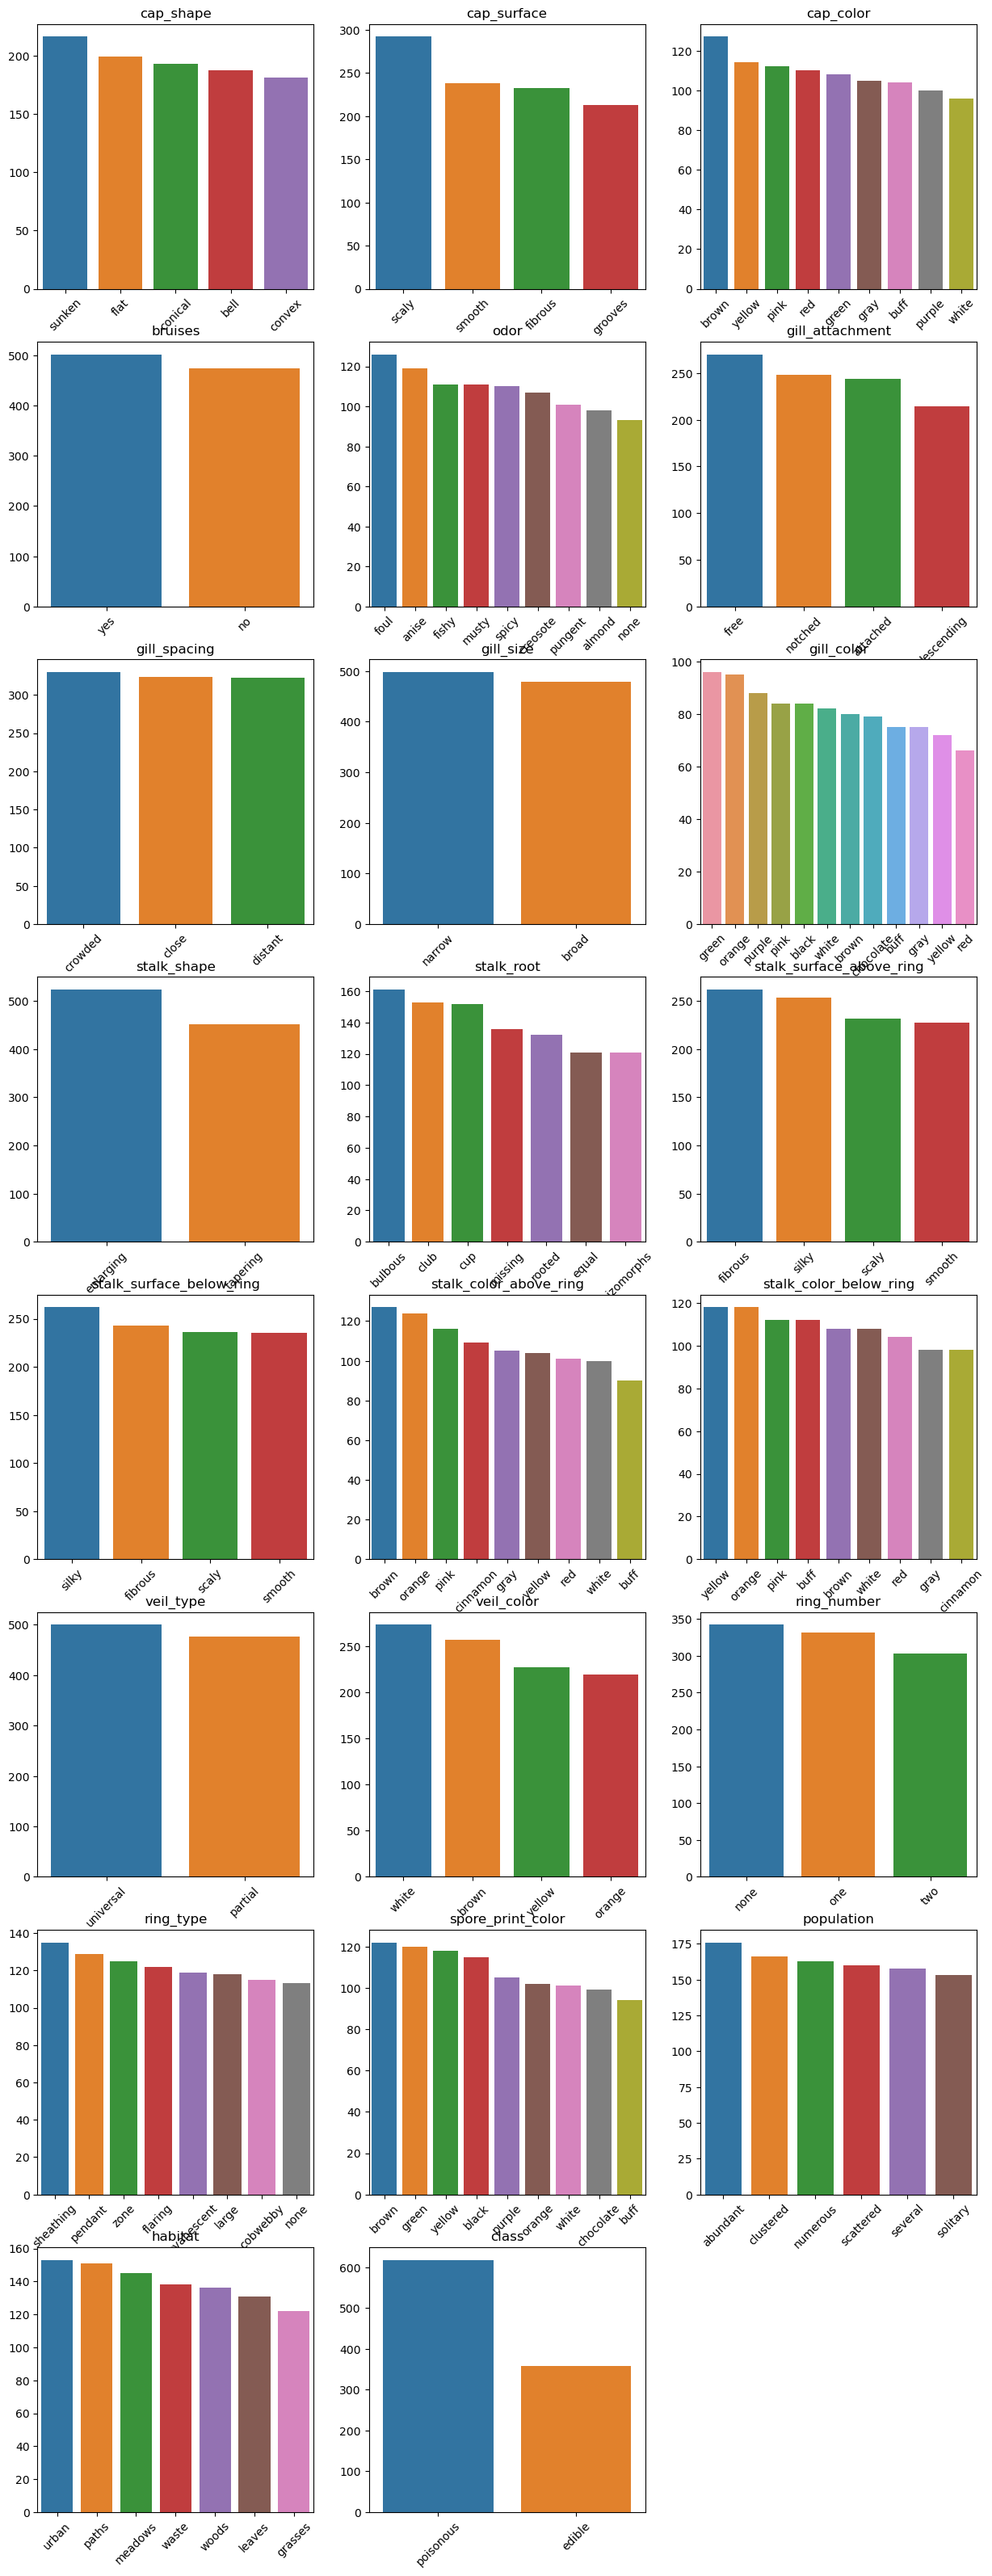

In [6]:
Cat_data=[x for x in data.columns if (data[x].dtype)=='object']

plt.figure(figsize=(15,40))

for x,y in enumerate(Cat_data):
    d=data[y].value_counts()
    plt.subplot(8,3,x+1)
    sns.barplot(x=d.index,y=d.values)
    plt.xticks(rotation=45)
    plt.title(y)
plt.show()

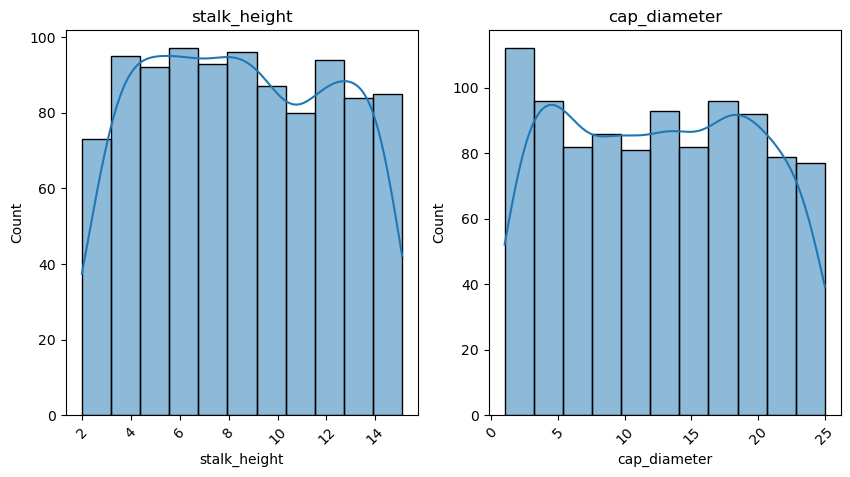

In [7]:
Num_data=[x for x in data.columns if (data[x].dtype)==float]

plt.figure(figsize=(10,5))

for x,y in enumerate(Num_data):
    plt.subplot(1,2,x+1)
    sns.histplot(data[y],kde=True)
    plt.xticks(rotation=45)
    plt.title(y)
plt.show()

## 💠Data Preprocessing
▶ There is imbalance in taget variable 'class'.

In [8]:
X=data.drop(['class','Unnamed: 0'],axis=1)
Y=data['class']
Y=Y.replace(['edible','poisonous'],[0,1])

### ▣ edible         :  0
### ▣ poisonous :  1

1    618
0    358
Name: class, dtype: int64


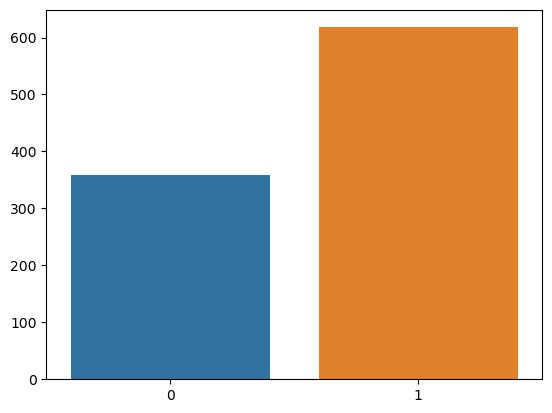

In [9]:
print(Y.value_counts())
sns.barplot(x=Y.value_counts().index,y=Y.value_counts().values)
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

print('▶Shape of X_train,y_train',(X_train.shape,y_train.shape))
print('▶Shape of X_test,y_test',(X_test.shape,y_test.shape))

▶Shape of X_train,y_train ((780, 24), (780,))
▶Shape of X_test,y_test ((196, 24), (196,))


In [11]:
Cat_data=[x for x in X.columns if (X[x].dtype)=='object']
Num_data=[x for x in X.columns if (X[x].dtype)==float]

Col_transformer=ColumnTransformer(
transformers=[('OHE',OneHotEncoder(sparse=False,drop='first'),Cat_data),
              ('MMSc',MinMaxScaler(),Num_data)],
remainder='passthrough'
)

X_train=Col_transformer.fit_transform(X_train)   
X_test=Col_transformer.fit_transform(X_test)   


print('▶Shape of X_train,y_train',(X_train.shape,y_train.shape))
print('▶Shape of X_test,y_test',(X_test.shape,y_test.shape))

▶Shape of X_train,y_train ((780, 104), (780,))
▶Shape of X_test,y_test ((196, 104), (196,))


C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## 💠SVM Implementation
▶ Visualization of SVM Results

▶ Parameter Tuning and Optimization

▶ Comparison and Analysis

### Oversampling : SMOTE

In [12]:
SM=SMOTE(random_state=42)
X_train_sm,y_train_sm=SM.fit_resample(X_train,y_train)
print('▶Shape of X_train,y_train',(X_train_sm.shape,y_train_sm.shape))

▶Shape of X_train,y_train ((998, 104), (998,))


1    499
0    499
Name: class, dtype: int64


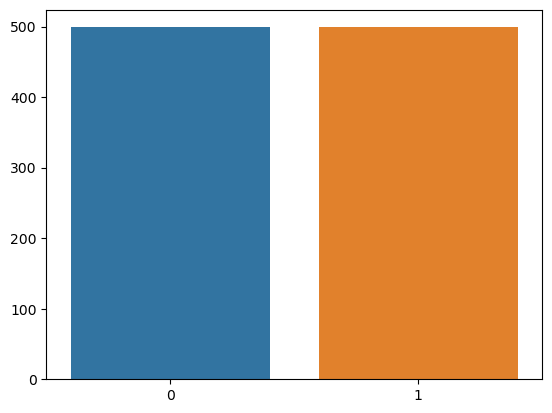

In [13]:
print(y_train_sm.value_counts())
sns.barplot(x=y_train_sm.value_counts().index,y=y_train_sm.value_counts().values)
plt.show()

In [14]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']

Result={
'kernel':kernel,
'Test_accuracy':[],
'Train_accuracy':[],
'precision_score_test':[],
'CM_test':[]
}



for i in kernel:
    Model_svc=SVC(kernel=i,max_iter=150,C=0.01)

    Model_svc.fit(X_train_sm,y_train_sm)

    y_predict=Model_svc.predict(X_test)
    y_pred_train=Model_svc.predict(X_train_sm)
    
    att=accuracy_score (y_test,y_predict)
    atn=accuracy_score (y_train_sm,y_pred_train)
    conf_mat = confusion_matrix(y_test,y_predict)
    Precision_score= precision_score(y_test,y_predict)

    Result['Test_accuracy'].append(att)   
    Result['Train_accuracy'].append(atn)
    Result['CM_test'].append(conf_mat)
    Result['precision_score_test'].append(Precision_score)
    
Result=pd.DataFrame(Result).set_index('kernel')
Result

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,Test_accuracy,Train_accuracy,precision_score_test,CM_test
kernel,,,,
linear,0.540816,0.525050,0.607407,"[[24, 53], [37, 82]]"
poly,0.586735,0.614228,0.603261,"[[4, 73], [8, 111]]"
rbf,0.551020,0.782565,0.601307,"[[16, 61], [27, 92]]"
sigmoid,0.545918,0.487976,0.591463,"[[10, 67], [22, 97]]"


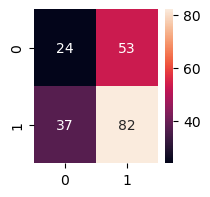

In [15]:
plt.figure(figsize=(2,2))                             #It is found that linear kernel gives the best generalized result 
sns.heatmap(Result['CM_test'][0],annot=True)
plt.show()

### Undersampling :RandomUnderSampler

In [16]:
Unser_sapmler=RandomUnderSampler(random_state=45)
x_train_resamp,y_train_resamp=Unser_sapmler.fit_resample(X_train,y_train)

print('▶Shape of X_train,y_train',(x_train_resamp.shape,y_train_resamp.shape))

▶Shape of X_train,y_train ((562, 104), (562,))


0    281
1    281
Name: class, dtype: int64


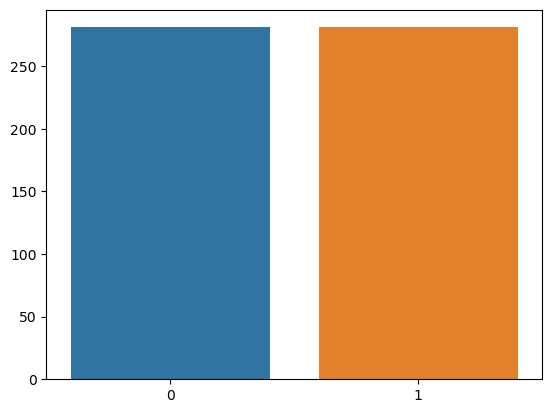

In [17]:
print(y_train_resamp.value_counts())
sns.barplot(x=y_train_resamp.value_counts().index,y=y_train_resamp.value_counts().values)
plt.show()

In [18]:
kernel=['linear', 'poly', 'rbf', 'sigmoid']

Result={
'kernel':kernel,
'Test_accuracy':[],
'Train_accuracy':[],
'precision_score_test':[],
'CM_test':[]
}



for i in kernel:
    Model_svc=SVC(kernel=i,max_iter=150,C=0.01)

    Model_svc.fit(x_train_resamp,y_train_resamp)

    y_predict=Model_svc.predict(X_test)
    y_pred_train=Model_svc.predict(x_train_resamp)
    
    att=accuracy_score (y_test,y_predict)
    atn=accuracy_score (y_train_resamp,y_pred_train)
    conf_mat = confusion_matrix(y_test,y_predict)
    Precision_score= precision_score(y_test,y_predict)

    Result['Test_accuracy'].append(att)   
    Result['Train_accuracy'].append(atn)
    Result['CM_test'].append(conf_mat)
    Result['precision_score_test'].append(Precision_score)
    
    
Result=pd.DataFrame(Result).set_index('kernel')
Result

C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\MAYUR\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=150).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


,Test_accuracy,Train_accuracy,precision_score_test,CM_test
kernel,,,,
linear,0.535714,0.571174,0.600000,"[[21, 56], [35, 84]]"
poly,0.591837,0.727758,0.606557,"[[5, 72], [8, 111]]"
rbf,0.576531,0.775801,0.621622,"[[21, 56], [27, 92]]"
sigmoid,0.551020,0.483986,0.596273,"[[12, 65], [23, 96]]"


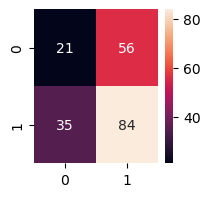

In [21]:
plt.figure(figsize=(2,2))                             #It is found that linear kernel gives the best generalized result 
sns.heatmap(Result['CM_test'][0],annot=True)
plt.show()

## 💠Conclusion:
#### ▶ About 50% data is found to be duplicate.
#### ▶ There is imbalance in target variable 'class'.
#### ▶ It is found that linear kernel gives the best generalized result with oversampling as well as with undersampling.
#### ▶ It can be seen that SVM dosn't holds good when the number of features is large and number of data points is very less.
#### ▶The value of C is hard to finetune. In this case smaller value of C gives better results. 
#### ▶SVM is prone to overfit for the current data
#### ▶Practical implications of SVM in real-world classification tasks.
        ▶Natural Language Processing (NLP):sentiment analysis, spam detection, and topic modeling
        ▶Image classification: object detection and image retrieval